## Final Project Submission

Please fill out:

- Student name:
- Student pace: self paced / part time / full time
- Scheduled project review date/time:
- Instructor name:
- Blog post URL:


In [11]:
# Your code here - remember to use markdown cells for comments as well!

## Importing necessary packages & connecting to database

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [13]:
conn = sqlite3.connect('/home/pk/Desktop/mds/data/im.db')

## Checking out the data 

In [14]:
movie_gross = pd.read_csv('data/bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Checking what is contained in im.db database, the two tables movie_basics and movie_ratings

In [15]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Checking the shape of the data in the movie_basics and movie_ratings tables

In [17]:
movie_basics.shape

(146144, 6)

In [18]:
movie_ratings.shape

(73856, 3)

## Solving the case of missing values in the movie_basics and movie_ratings tables

Checking the number of missing values in the movie_basics and movie_ratings tables

In [19]:
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [20]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Figuring out the percentage of missing data in the runtime_minutes in the movie_basics table

Figuring out the percentage of missing data in the genres in the movie_basics table

In [21]:
movie_basics['genres'].isna().sum()/len(movie_basics['genres'])

0.037004598204510616

Since the amount of missing values is little (3.7%), then we can drop the rows with missing values.

In [22]:
movie_basics = movie_basics.dropna(subset=['genres'])
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

Since there are only two missing values in the original title column in the movie_basics table we can also drop them

In [23]:
movie_basics = movie_basics.dropna(subset=['original_title'])
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

Figuring out the percentage of missing values in the runtime_minutes column in the movie_basics table

In [24]:
movie_basics['runtime_minutes'].isna().sum()/len(movie_basics['runtime_minutes'])

0.20252391035570652

The percentage of missing values in the runtime_minutes column in the movie_basics table is 20.25%.
We can deal with these missing values by:
1. Ignoring the missing values by dropping the rows, however this might lead to losing some valuable
data.
2. Replacing the missing values by using a measure of central tendency either mean or median. Since this numerical data and not categorical data there is no need of using mode

Let`s check what the effect would be of dropping the rows with missing values by looking at the measures of central tendency and standard deviation before and after dropping the missing values

In [25]:
print(movie_basics['runtime_minutes'].apply(['mean', 'median', 'std']))
movie_basics['runtime_minutes'].isna().sum()

mean       86.261556
median     87.000000
std       167.896646
Name: runtime_minutes, dtype: float64


28502

In [26]:
movie_basics_na_dropped = movie_basics.dropna(subset=['runtime_minutes'])
print(movie_basics_na_dropped['runtime_minutes'].apply(['mean', 'median', 'std']))
movie_basics_na_dropped['runtime_minutes'].isna().sum()

mean       86.261556
median     87.000000
std       167.896646
Name: runtime_minutes, dtype: float64


0

There is no change therefore it\`s best to replace the missing values with mean. Since both mean and median are almost the same we can use mean since it\`s a better measure of central tendecy

In [27]:
mean_runtime = movie_basics['runtime_minutes'].mean()

# replace missing values with the mean value
movie_basics['runtime_minutes'].fillna(mean_runtime, inplace=True)

In [28]:
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

We have now solved the case of missing values in the movie_basics table

## Solving the case of duplicates in movie_basics table

In [29]:
movie_basics.duplicated(subset=['original_title']).sum()


7712

There are 7712 duplicate names of movies, so we have to drop the duplicates and keep one.

In [30]:
movie_basics = movie_basics.drop_duplicates(subset=['original_title'])
movie_basics.duplicated(subset=['original_title']).sum()

0

## Overall statistics of the start_year and runtime_minutes in the movie_basics table

Now that we have dropped and replaced the missing values and dropped the duplicated values we can look overall statistics of the start_year and runtime_minutes in the movie_basics table 

In [31]:
movie_basics.describe()

,start_year,runtime_minutes
count,133022.000000,133022.000000
mean,2014.559569,86.338496
std,2.730500,154.048305
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.261556
75%,2017.000000,95.000000
max,2027.000000,51420.000000


Let`s look at the relationship between the start_year and the average movie run_time

In [32]:
grouped_movie_runtime = movie_basics.groupby(['start_year'])['runtime_minutes'].mean()
grouped_movie_runtime = pd.DataFrame(grouped_movie_runtime)
grouped_movie_runtime

,runtime_minutes
start_year,
2010,85.839298
2011,86.538555
2012,89.079883
2013,85.369896
2014,84.842682
2015,85.803347
2016,85.217588
2017,85.915467
2018,87.348762


In [33]:
grouped_movie_runtime.reset_index()
grouped_movie_runtime

,runtime_minutes
start_year,
2010,85.839298
2011,86.538555
2012,89.079883
2013,85.369896
2014,84.842682
2015,85.803347
2016,85.217588
2017,85.915467
2018,87.348762


## Merging the movie_basics and movie_ratings

The movie_basics and movie_ratings tables have the same column movie_id showing that they are related tables we can merge them together so as to conduct some analysis

In [36]:
movie_ratings_basics = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
movie_ratings_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119


In [39]:
movie_ratings_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69368 entries, 0 to 69367
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         69368 non-null  object 
 1   primary_title    69368 non-null  object 
 2   original_title   69368 non-null  object 
 3   start_year       69368 non-null  int64  
 4   runtime_minutes  69368 non-null  float64
 5   genres           69368 non-null  object 
 6   averagerating    69368 non-null  float64
 7   numvotes         69368 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.8+ MB


## Number of Votes by Year

In [57]:
votes_grouped = movie_ratings_basics.groupby('start_year')['numvotes'].mean().sort_values(ascending= False)
votes_grouped

start_year
2010    4605.929609
2013    4530.501118
2011    4514.282520
2012    4361.501901
2014    4172.038971
2016    2974.109152
2015    2949.843809
2017    2514.909114
2018    2150.230623
2019    1275.249500
Name: numvotes, dtype: float64

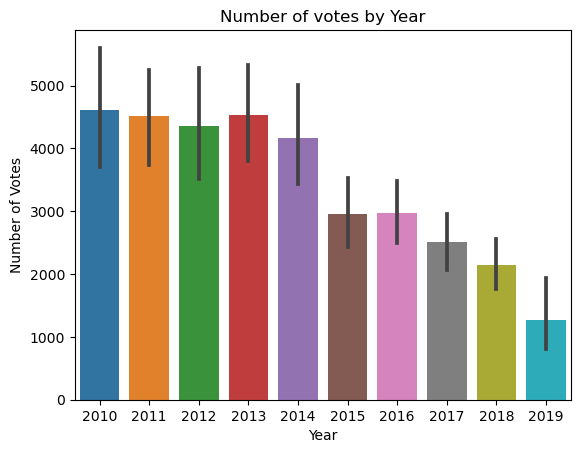

In [59]:
sns.barplot(x= movie_ratings_basics['start_year'], y = movie_ratings_basics['numvotes'], data = movie_ratings_basics)
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.title('Number of votes by Year')
plt.show()

It looks like the number of votes has been decreasing with each passing year. The average number of year votes over the years has been decreasing too over the years

## Relationship between number of votes and average rating

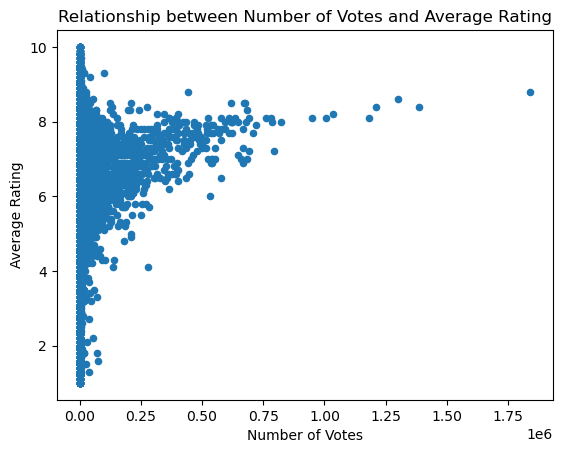

In [42]:
movie_ratings_basics.plot(kind='scatter', x='numvotes', y='averagerating')


plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Relationship between Number of Votes and Average Rating')

plt.show()

## Movie Runtimes over the years

In [62]:
runtime_grouped = movie_ratings_basics.groupby('start_year')['runtime_minutes'].mean().sort_values(ascending= False)
runtime_grouped

start_year
2012    98.327358
2019    97.750334
2018    95.691921
2017    94.078011
2011    93.487587
2016    93.108095
2015    92.914827
2014    92.776347
2010    92.016837
2013    92.003851
Name: runtime_minutes, dtype: float64

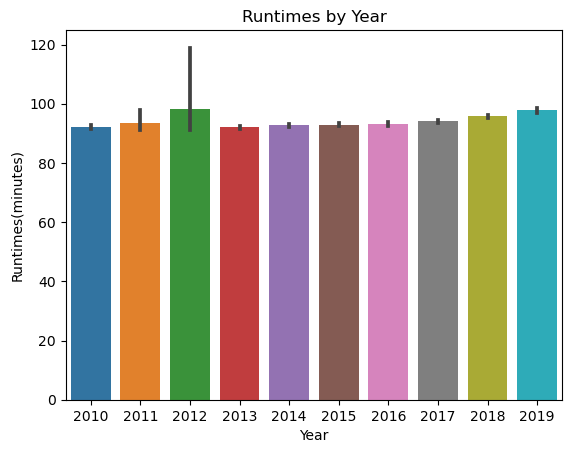

In [61]:
sns.barplot(x= movie_ratings_basics['start_year'], y = movie_ratings_basics['runtime_minutes'], data = movie_ratings_basics)
plt.xlabel('Year')
plt.ylabel('Runtimes(minutes)')
plt.title('Runtimes by Year')
plt.show()

It looks like the movie runtime haven\`t changed much over the years. The average runtime hasn\`t changed much too over the years